In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



Support Vector Regressor (SVR)

Support Vector Regressor adalah varian dari SVM yang digunakan untuk prediksi nilai numerik. Berbeda dari Linear Regression yang meminimalkan error rata-rata, SVR mencoba mencari fungsi yang berada dalam batas toleransi tertentu (margin of tolerance). Dengan menggunakan kernel seperti RBF (Radial Basis Function), SVR mampu menangkap hubungan non-linear antar fitur. Kelebihannya adalah stabil dan efektif pada data dengan pola kompleks, meskipun lebih lambat dibanding Linear Regression.

In [5]:
df = pd.read_csv("enhanced_anxiety_dataset.csv")

# ==============================
# 3. Ubah Kolom Target Menjadi Kategorikal
# ==============================
def categorize_anxiety(level):
    if level <= 3:
        return "Low"
    elif level <= 7:
        return "Medium"
    else:
        return "High"

df["Anxiety_Category"] = df["Anxiety Level (1-10)"].apply(categorize_anxiety)

# ==============================
# 4. Pisahkan fitur dan target
# ==============================
X = df.drop(columns=["Anxiety Level (1-10)", "Anxiety_Category"])
y = df["Anxiety_Category"]

# ==============================
# 5. Encoding kolom kategorikal
# ==============================
# Ubah kolom object menjadi kolom numerik (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# ==============================
# 6. Split Data Training dan Testing
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 7. Normalisasi Data (Standarisasi)
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 8. Model Support Vector Classifier
# ==============================
svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# ==============================
# 9. Evaluasi Model
# ==============================
y_pred = svc_model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

Akurasi Model: 0.8004545454545454

=== Classification Report ===
              precision    recall  f1-score   support

        High       0.99      0.99      0.99       203
         Low       0.80      0.78      0.79      1040
      Medium       0.76      0.79      0.77       957

    accuracy                           0.80      2200
   macro avg       0.85      0.85      0.85      2200
weighted avg       0.80      0.80      0.80      2200


=== Confusion Matrix ===
[[201   0   2]
 [  0 808 232]
 [  3 202 752]]


Visualisasi Hasil Prediksi SVM (Scatter Plot)

Scatter plot digunakan untuk menampilkan hasil prediksi model SVM setelah dilakukan reduksi dimensi dengan PCA menjadi dua komponen utama (PC1 dan PC2).
Plot pertama menunjukkan distribusi data berdasarkan label aktual, plot kedua berdasarkan hasil prediksi model, dan plot ketiga membandingkan prediksi benar (hijau) serta salah (merah).
Visualisasi ini membantu memahami bagaimana model memisahkan kelas Low, Medium, dan High pada data uji.

/tmp/ipython-input-4119672528.py:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


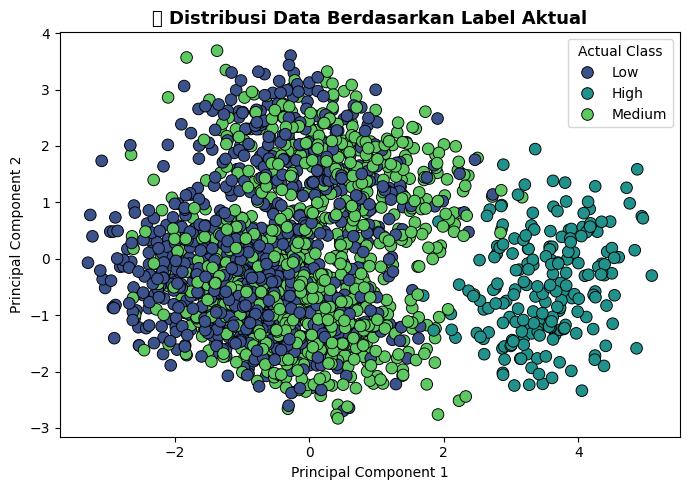

/tmp/ipython-input-4119672528.py:39: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


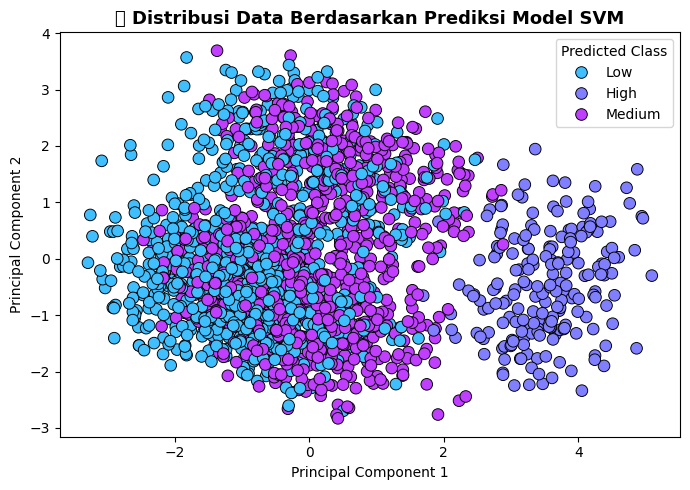

/tmp/ipython-input-4119672528.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4119672528.py:56: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


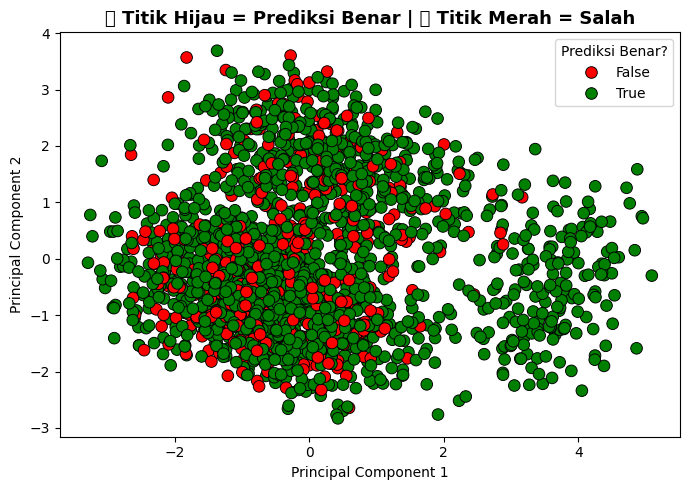

In [6]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Buat DataFrame hasil PCA dan prediksi
df_plot = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Actual': y_test.values,
    'Predicted': y_pred
})

# ==============================
# 1️⃣ Scatter Plot - Berdasarkan Label Aktual
# ==============================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Actual',
    data=df_plot, palette='viridis', s=70, edgecolor='black'
)
plt.title("🎯 Distribusi Data Berdasarkan Label Aktual", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Actual Class')
plt.tight_layout()
plt.show()

# ==============================
# 2️⃣ Scatter Plot - Berdasarkan Prediksi Model
# ==============================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Predicted',
    data=df_plot, palette='cool', s=70, edgecolor='black'
)
plt.title("🤖 Distribusi Data Berdasarkan Prediksi Model SVM", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Predicted Class')
plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Scatter Plot - Bandingkan Prediksi vs Aktual (warna beda untuk error)
# ==============================
df_plot["Correct"] = df_plot["Actual"] == df_plot["Predicted"]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Correct',
    data=df_plot, palette={True: "green", False: "red"}, s=70, edgecolor='black'
)
plt.title("✅ Titik Hijau = Prediksi Benar | ❌ Titik Merah = Salah", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Prediksi Benar?')
plt.tight_layout()
plt.show()

Epoch 1/80


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9057 - mae: 1.4338 - val_loss: 1.2692 - val_mae: 0.8949
Epoch 2/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2237 - mae: 0.8896 - val_loss: 1.2063 - val_mae: 0.8773
Epoch 3/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1423 - mae: 0.8545 - val_loss: 1.1928 - val_mae: 0.8738
Epoch 4/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1201 - mae: 0.8509 - val_loss: 1.2039 - val_mae: 0.8798
Epoch 5/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0991 - mae: 0.8379 - val_loss: 1.1766 - val_mae: 0.8605
Epoch 6/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0459 - mae: 0.8189 - val_loss: 1.2159 - val_mae: 0.8807
Epoch 7/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0367 - mae: 0.8188 - val_loss: 1.1860 - val_mae: 0.8668
Epoch 8/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0029 - mae: 0.8026 - val_loss: 1.1631 - val_mae: 0.8597
Epoch 9/80
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0426 

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


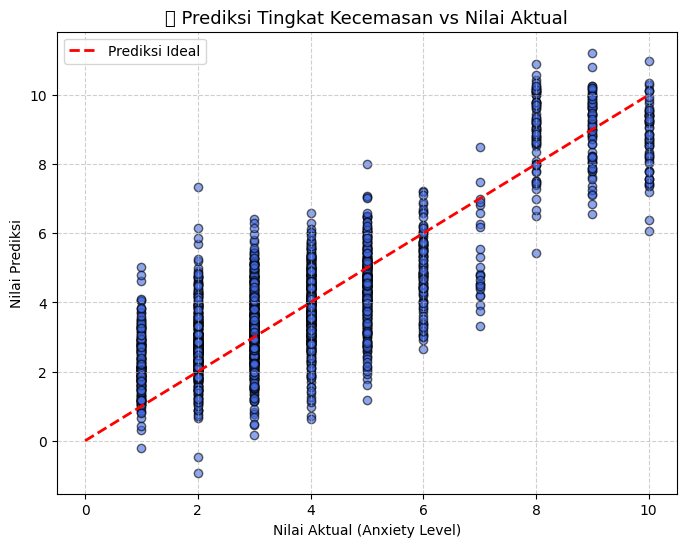

In [7]:
df = pd.read_csv("enhanced_anxiety_dataset.csv")

# Kolom target numerik
target_col = "Anxiety Level (1-10)"

#  2. Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

#  3. Split Data Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🔹 4. Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 5. Model Sequential (Regresi)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # output numerik
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']  # Mean Absolute Error
)

# 🔹 6. Training Model
history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# 🔹 7. Evaluasi Akurasi
train_mae = history.history['mae'][-1]
val_mae = history.history['val_mae'][-1]

# Karena ini regresi, kita ubah MAE menjadi “akurasi kira-kira” agar lebih intuitif:
train_acc = max(0, (1 - train_mae / 10)) * 100
val_acc = max(0, (1 - val_mae / 10)) * 100

print(f"Akurasi Training (estimasi): {train_acc:.2f}%")
print(f"Akurasi Validation (estimasi): {val_acc:.2f}%")

# 🔹 8. Plot Hasil Prediksi
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, edgecolor='k')
plt.plot([0,10], [0,10], 'r--', lw=2, label='Prediksi Ideal')
plt.title('💡 Prediksi Tingkat Kecemasan vs Nilai Aktual', fontsize=13)
plt.xlabel('Nilai Aktual (Anxiety Level)')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###  Model Deep Learning untuk Prediksi Tingkat Kecemasan
Model ini menggunakan pendekatan **regresi** karena label target berupa nilai numerik ("Anxiety Level (1–10)").  
Arsitektur model dibuat sederhana menggunakan **Sequential Model** dengan 2 hidden layer (`ReLU`) dan 1 output layer linear.  

Data di-*split* menjadi **80% training** dan **20% testing**, lalu dinormalisasi dengan `StandardScaler`.

**Evaluasi menggunakan Mean Absolute Error (MAE)**, kemudian dikonversi menjadi estimasi akurasi agar mudah dibaca.  
Plot scatter menunjukkan hubungan antara nilai aktual dan nilai prediksi — semakin dekat ke garis merah berarti model semakin akurat.
